# Machine Leaarning-Unsupervised Learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#use seaborn ploting style defult
import seaborn as sns;sns.set();

# Rescaling

In [2]:
#x-average/std

In [3]:
a=np.array([1,2,3,4,5])
a_standardized=(a-np.mean(a))/np.std(a)
print(a_standardized)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [4]:
print(a.mean())
print(a.std())

3.0
1.4142135623730951


In [5]:
print(a_standardized.mean())
print(a_standardized.std())

0.0
0.9999999999999999


# using Sickit Learn for transformation

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris=load_iris()
X,y=iris.data,iris.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print(X_train.shape)

(112, 4)


In [8]:
print('mean %s ='% X_train.mean(axis=0))
print('std %s ='% X_train.std(axis=0))

mean [5.85267857 3.06160714 3.79553571 1.22857143] =
std [0.84123207 0.43777961 1.78467626 0.77048553] =


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

In [11]:
print('mean %s ='% X_train_scaled.mean(axis=0))
print('std %s ='% X_train_scaled.std(axis=0))

mean [ 2.91433544e-16 -3.32472145e-15 -2.16096982e-16  1.78428700e-16] =
std [1. 1. 1. 1.] =


In [12]:
print(X_train_scaled[:10])

[[-0.181494    3.05722976 -1.28624769 -1.07538869]
 [ 2.19597123 -0.14072639  1.2912506   1.39058882]
 [-1.13248009  0.08769905 -1.28624769 -1.46475356]
 [-0.181494   -0.36915183  0.22663174  0.09270592]
 [-0.77586031  0.77297537 -1.34228026 -1.33496527]
 [ 1.00723862 -0.14072639  0.78695745  1.39058882]
 [ 0.05625253 -0.14072639  0.22663174  0.3522825 ]
 [ 0.29399905 -0.59757726  0.5067946  -0.03708237]
 [ 1.24498514  0.08769905  0.73092488  1.39058882]
 [-0.53811378  0.77297537 -1.28624769 -1.07538869]]


In [13]:
X_test_scaled=scaler.transform(X_test)

In [14]:
print('mean %s ='% X_test_scaled.mean(axis=0))

mean [-0.04385127 -0.03853606 -0.08302194 -0.14979325] =


In [15]:
#WE CAN USE OTHER FORMS OF TRANSFORMATIONS LIKE
#standardscaler
#minmaxscaler:transform data between 0 and 1
#Robustscaler:more sensitive to noise or outlier

# PCA(Principal Component Analysis)

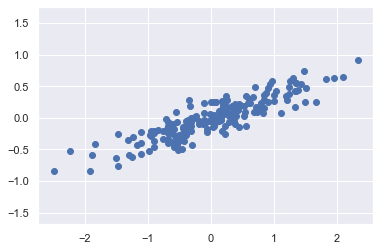

In [16]:
#Create normal distribition of data
import numpy as np
np.random.seed(1)
X=np.dot(np.random.random(size=(2,2)),np.random.normal(size=(2,200))).T
plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal');

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [18]:
v1=pca.components_[:,0]
v2=pca.components_[:,1]
print(v1)
print(v2)

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]


In [19]:
print(np.dot(v1,v2))

0.0


In [20]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))


1.0
1.0


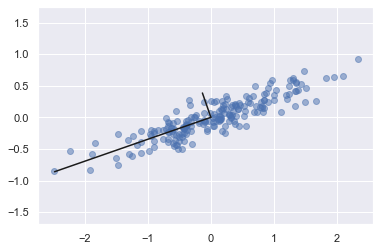

In [21]:
plt.plot(X[:,0],X[:,1],'o',alpha=0.5)
for lenght , vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(lenght)
    plt.plot([0,v[0]],[0,v[1]],'-k')
plt.axis('equal');


In [22]:
clf=PCA(0.95)#keep 95 precent of variance
X_trans=clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


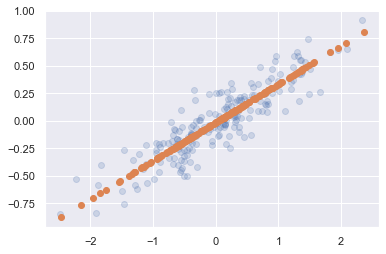

In [23]:
X_new=clf.inverse_transform(X_trans)
plt.plot(X[:,0],X[:,1],'o',alpha=0.2)
plt.plot(X_new[:,0],X_new[:,1],'o');

# PCA on Digits Dataset

In [24]:
from sklearn.datasets import load_digits
digits=load_digits()
X=digits.data
y=digits.target

In [25]:
pca=PCA(n_components=2)
x_proj=pca.fit_transform(X)
print(X.shape)
print(x_proj.shape)

(1797, 64)
(1797, 2)


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19932\1980538406.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


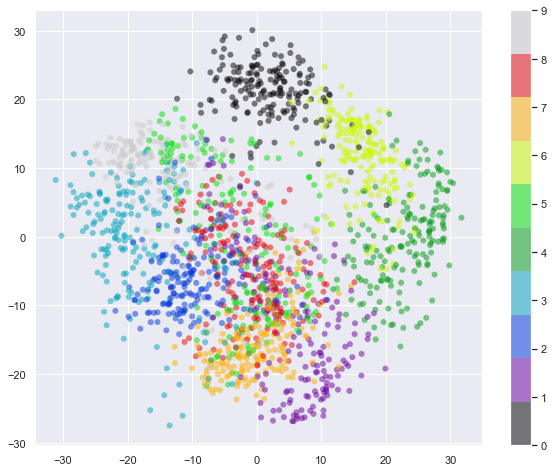

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(x_proj[:,0],x_proj[:,1],c=y,edgecolors='none',alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar();

In [27]:
print(pca.explained_variance_ratio_)

[0.14890594 0.13618771]


In [28]:
print(range(1,len(pca.explained_variance_ratio_)+1))

range(1, 3)


In [29]:
print( np.cumsum(pca.explained_variance_ratio_))

[0.14890594 0.28509365]


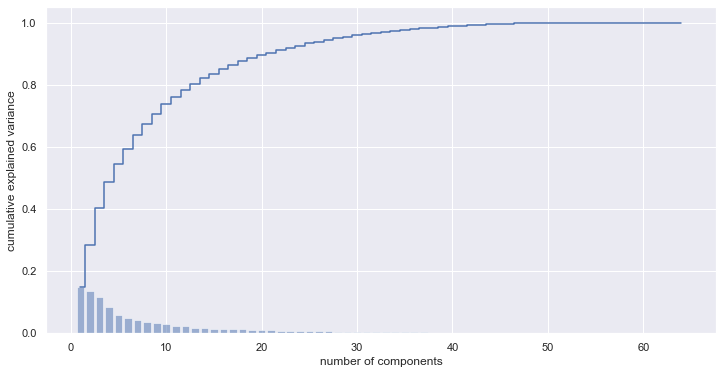

In [30]:
sns.set()
plt.figure(figsize=(12,6))

pca=PCA().fit(X)
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),
       pca.explained_variance_ratio_,
       alpha=0.5,
       align='center');
plt.step(range(1,len(pca.explained_variance_ratio_)+1),
       np.cumsum(pca.explained_variance_ratio_),
       where='mid');
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# PCA as data compression

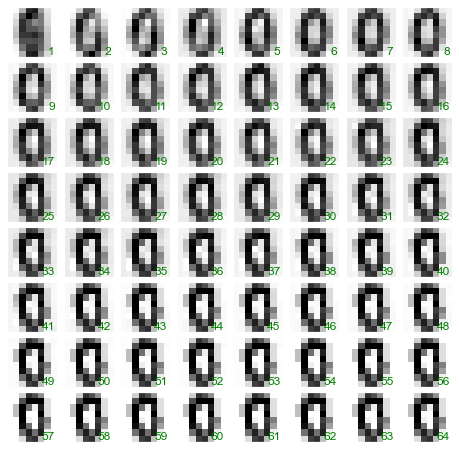

In [31]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, '{0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

# Unsupervised Learning: Clustering
For a comlete introduction please see Clustering

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance.

In [32]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
print(X.shape)

(100, 2)


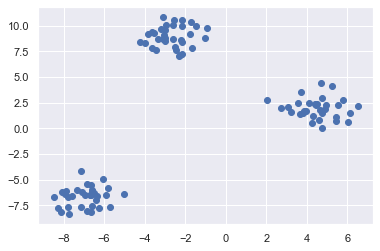

In [33]:
plt.scatter(X[:,0],X[:,1]);

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [36]:
labels = kmeans.fit_predict(X)
print(labels)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


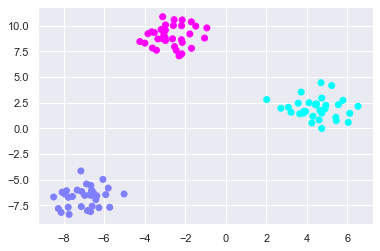

In [37]:
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels);

# Choosing number of clusters

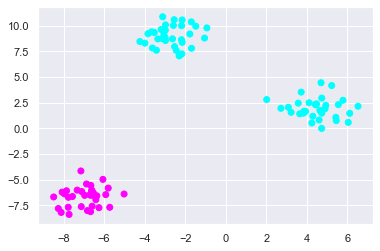

In [38]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.cool, c=labels);

In [39]:
print(kmeans.cluster_centers_)


[[ 0.86236563  5.48955564]
 [-6.95170962 -6.67621669]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


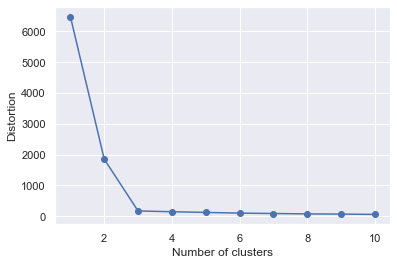

In [40]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

# Kmeans for Digits datasets

In [41]:
from sklearn.cluster import KMeans

In [43]:
kms=KMeans(n_clusters=10)
clusters=kms.fit_predict(digits.data)
print(kms.cluster_centers_.shape)

(10, 64)


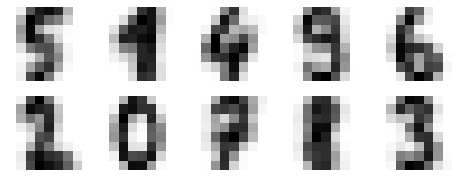

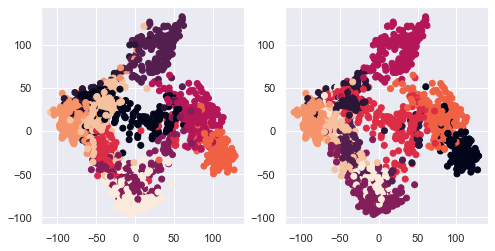

In [47]:
#------------------------------------------------------------
# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kms.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
    ax.grid(False)
    ax.axis('off')
    
#------------------------------------------------------------
# visualize the projected data
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target);